# Intro to Plotting
There are many different packages for Python that allow you to make publication quality plots. The "best" choice depends on what you are trying to accomplish, what style you prefer, and what you are familiar with.

The most commonly used packages are:
1. Matplotlib  - This is probably the most used plotting package. It has been around for a while, it is completely free and well supported. It uses a syntax that is similar to MatLab, so if you know MatLab, it will feel familiar.
A very nice summary documentation can be found in the book ["Python Data Science, CH4"](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html) and the documentation is here:
[Documentation: MatPlotLib](https://matplotlib.org)
1. Plotly - This is a relatively newer plotting package. It is a commercial package turned open-source that is free to use. What is special about this package is that it uses your browser for the output. The package converts the Python into JavaScript, which then runs in your browser. This allow you to interact with the resulting graphs. If you pay them, they can also host your plots for you on their cloud space. In addition to Plotly, the same company has a product called Dash, which allows you to make the web pages truly interactive. Though that setup is not trivial, it is a great choise to display graphs that were created from live data from, for instance, a Raspberry Pi, using their Dash App. The notebook: ["03b_Intro_Plotting_w_Plotly"](https://github.com/mholtrop/Phys601/blob/master/Notebooks/03b_Intro_Plotting_w_Plotly.ipynb) explores this a bit more. [Documentation: Plotly](https://plot.ly/python/) [Plotly main site](https://plot.ly)
1. Bokeh - This package takes a similar approach as Plotly, but is backed by a non profit rather than a commercial entity. It also has the intend to make fully interactive graphs from your data using Python. [Documentation: Bokeh](https://bokeh.pydata.org/en/latest)

While Plotly and Bokeh create really nice plots and have capabilities beyond what Matplotlib can provide, we will start exploring plotting with Matplotlib, because it is easier to get started with. I will leave Plotly and Bokeh for you to explore on your own if you so choose.

## Getting started with Matplotlib

You can find more details for Matplotlib in the [Documentation](https://matplotlib.org) and also in the online book chapter 5, *Scientific Computing with Python*.

To get started with Matplotlib, you need to import the package into Python. The part that you typically interact with is the sub-package, matplotlib.pyplot. A standard way to import the package is with
`import matplotlib.pyplot as plt`
For a _notebook_ it is useful to first tell the notebook that you want it to show all the plots _inline_. The first line of the notebook should then be the magic function: `%matplotlib inline`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

The most basic plot you can make is a simple line plot of a funcion. You would need to fill a list with x values, and another list with y values, and then plot them. The Numpy package makes it easier to create such arrays, but it is not required.

A super simple example, where you know the numerical data for x and y. 

**Note:** if you do this from ipython, then you need to tell Python that you want to see the figure. In that case, you need to follow these commands with "plt.show()". Python will then popup a new window showing your plot. However, if you used plt.show() in a Jupyter notebook, you will get an error message, or the statement is ignored.

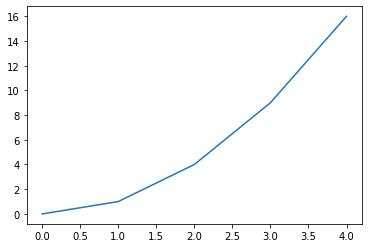

In [2]:
x = range(5)         # Create a list of the values [0,1,...14]
y = [q*q for q in x ] # Use list comprehension to create a list of x-squared values
plot=plt.plot(x,y)    # Make a plot with them.

This works, but all of this is much easier and cleaner using Numpy. This is what Numpy is good at. The same plot using Numpy:

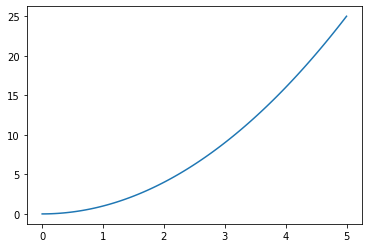

In [3]:
import numpy as np
x = np.linspace(0,5,100)  # We want a really smooth plot with a 100 points instead of 15.
y = x*x                    # This computes an array y with each element filled with x-square.
plot=plt.plot(x,y)

You can see that using more points makes a smoother plot. This would have been possible without Numpy as well, but you would need to take additional steps.

Now play with this yourself and try some differnt functions to plot.

If you had some data on in a file, you could plot that data instead of a function. Just load the data into an array (or list) and you can plot it. We will learn later how you can load data into an array.

## Decorating your plot

The simple plot we just made is fine for a quick look at the shape of a function, but it is insufficient when you want to submit it for your homework, or a paper. We need a title, we need to label the axes, and often we need multiple curves on the same plot and include a legend. We also may want the plot to be larger, have a different aspect ratio, and we probably want to save the plot to a pdf file. 

You can use plt.figure() to set the size of your canvas, and if the output is in a raster format, you can set the dots-per-inch (dpi). Since we plan to plot to pdf, we only set the size, in inches.

After we created the figure object, we can use it to add axes, labels and plot the data. In the book you will learn there are two ways to do this. Here I will show you the most flexible way, which takes a bit more typing but gives you the full capability of Matplotlib.

We can give our plot a title with plt.title("title string") and label the axes

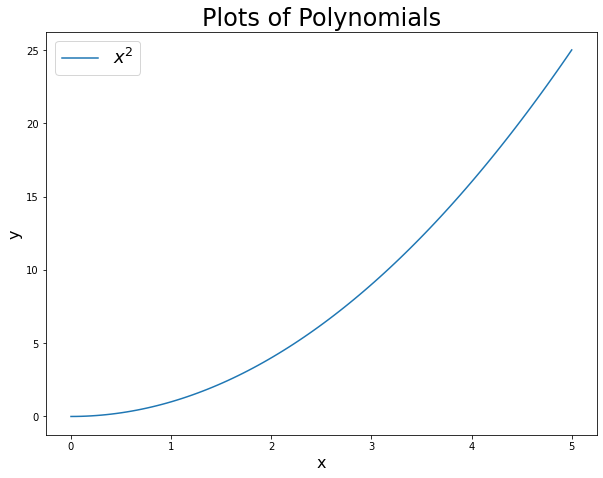

In [4]:
fig=plt.figure(figsize=(9,7)) # This does not show anything yet, it create a 10"x8" figure space
axes = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on.
# The numbers are the amount of white space to leave for the border. [x_low,y_low,x_width,y_width]
# The choice made here [0.1,0.1,0.85,0.8] leaves enough space for good effect.
# Set to [0,0,1,1] for no space at all.
axes.plot(x,y,label="$x^2$")                # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
axes.set_title('Plots of Polynomials',fontsize=24) # Give the plot a title, extra large.
axes.set_xlabel('x',fontsize=16)                        # Set a label of the x-axis
axes.set_ylabel('y',fontsize=16)
axes.legend(fontsize=18)

## Changing the tick marks
If you want to change the tick marks in your plot, you can supply them specifically to matplotlib and it will use your tick marks, and tick labels, instead of the automatically generated ones. Here is an example for a sine 

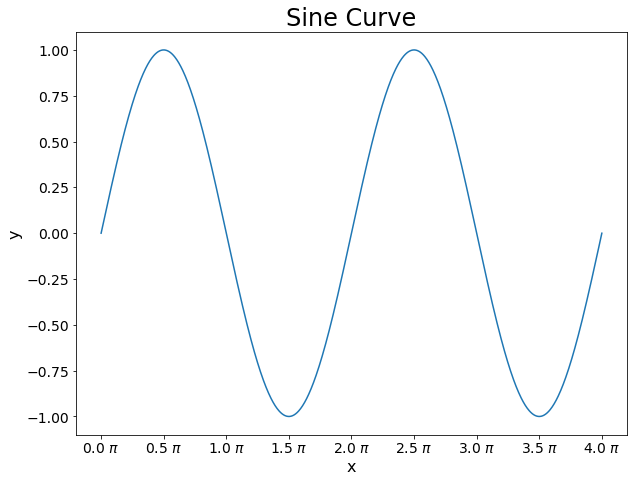

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xmax = 4*np.pi
x = np.linspace(0,xmax,1000)
y = np.sin(x)
fig=plt.figure(figsize=(9,7)) # This does not show anything yet, it create a 10"x8" figure space
ax = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on.
ax.plot(x,y)
ax.set_xticks([i*np.pi/2. for i in range(9)])         # Set the location for the x-ticks./
ax.set_xticklabels([f"{i/2.}$~\pi$" for i in range(9)] ,fontsize=14) # Set the labels for the xticks, and font size.
ax.set_title("Sine Curve",fontsize=24)
ax.set_xlabel('x',fontsize=16)        
ax.set_ylabel('y',fontsize=16)
plt.yticks(fontsize=14)           # Don't change the y ticks, just use larger font.
plt.show()

## Multiple curves on a single plot

Our current plot starts to look good and has all the attributes it needs. The legend isn't really needed if you plot a single curve, we could have put that information in the title, but for multiple curves a legend is very important. 

If you want to make a plot with many curves on it, you can simply call the axes.plot() function more than once. 
Here, we will plot a set of different polynomials. We start from scratch so we can reset the x-axis.

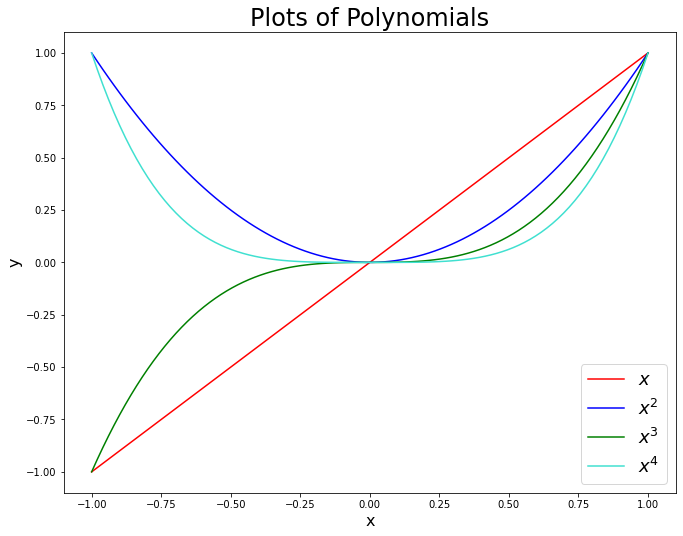

In [6]:
x = np.linspace(-1,1,100)
y1 = x
y2 = x*x
y3 = x*x*x
y4 = x*x*x*x
fig=plt.figure(figsize=(10,8)) # This does not show anything yet, it create a 10"x8" figure space
axes = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on, leaving 10% border.
axes.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
axes.set_title('Plots of Polynomials',fontsize=24) # Give the plot a title, extra large.
axes.set_xlabel('x',fontsize=16)                        # Set a label of the x-axis
axes.set_ylabel('y',fontsize=16)
axes.legend(fontsize=18)

## Plotting with a logarithmic y scale
Often in scietific plotting you do not want the y scale to be linear, but instead want y, or x, or both, to be logarithmic. This is quite simple to accomplish with axes.semilogy() and axes.semilogx(), which give you a logarithmic y- and x-axis respectively.

Note that to do this with our polynomial functions, we need to be careful around zero, since $\log(0)= -\infty$. We accomplish this by starting our x axis past zero.

Below is the code to create the log-log plot of the polynomials. Note how you can now read the order of the exponent from the slope of the curve.

[]

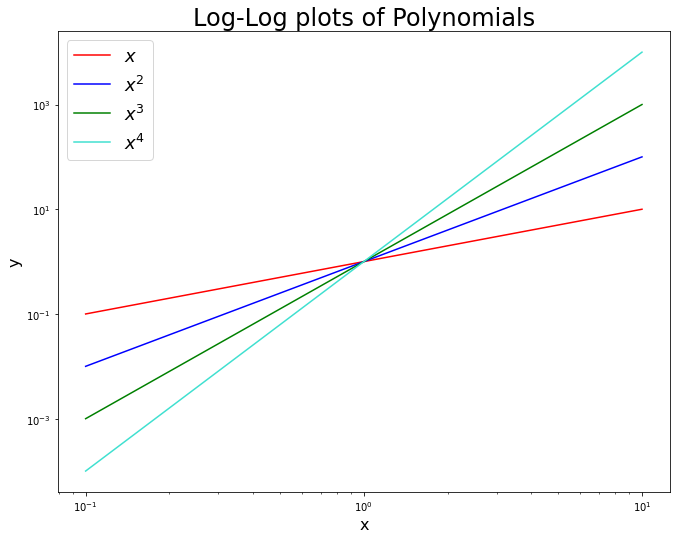

In [7]:
x = np.linspace(0.1,10,1000)
y1 = x
y2 = x*x 
y3 = x*x*x 
y4 = x*x*x*x
fig=plt.figure(figsize=(10,8)) # This does not show anything yet, it create a 10"x8" figure space
axes = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on, leaving 10% border.
axes.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
axes.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
axes.set_title('Log-Log plots of Polynomials',fontsize=24) # Give the plot a title, extra large.
axes.set_xlabel('x',fontsize=16)                        # Set a label of the x-axis
axes.set_ylabel('y',fontsize=16)
axes.legend(fontsize=18)
axes.semilogy()
axes.semilogx()

## Saving Just the Plot to PDF
You can save just your plot to pdf, or some other format like .jpg or .png or .svg, by using the fig.savefig("filename.ext") command. The output file type will depend on what you choose for the ".ext" part of your filename. For best quality results, you should choose a vector format like ".pdf", ".ps" or for web presenation, ".svg". The file will show up in the current directory.

In [8]:
fig.savefig("poly_log_log.pdf")

## Multiple Plots in the Same Figure

We often want multiple plots in the same figure, so that when we save the figure, the plots are all together. There are two ways to accomplish this: 
1. You can call `fig.add_axes()` multiple times with different (or the same) arguments. Each call will make new axes, and the parameters will determine the location of your plot. This is very flexible, but plot placement can become cumbersome. 
2. You can use `fig.subplots(nx,ny)`, which will make the division automatically in a grid like pattern for nx plots horizontally and ny plots vertically.

Here is an example of each use.

[]

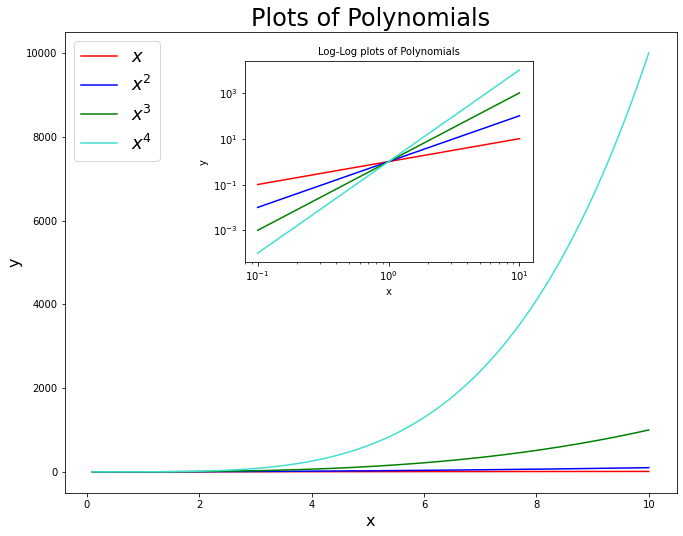

In [9]:
fig=plt.figure(figsize=(10,8)) # This does not show anything yet, it create a 10"x8" figure space
ax1 = fig.add_axes([0.1,0.1,0.85,0.8]) # This creates the axes to plot on, leaving 10% border.
ax1.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
ax1.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
ax1.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
ax1.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
ax1.set_title('Plots of Polynomials',fontsize=24) # Give the plot a title, extra large.
ax1.set_xlabel('x',fontsize=16)                        # Set a label of the x-axis
ax1.set_ylabel('y',fontsize=16)
ax1.legend(fontsize=18)

ax2 = fig.add_axes([0.35,0.5,0.4,0.35])
ax2.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
ax2.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
ax2.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
ax2.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
ax2.set_title('Log-Log plots of Polynomials',fontsize=10) # Give the plot a title, extra large.
ax2.set_xlabel('x',fontsize=10)                        # Set a label of the x-axis
ax2.set_ylabel('y',fontsize=10)
ax2.semilogy()
ax2.semilogx()

[]

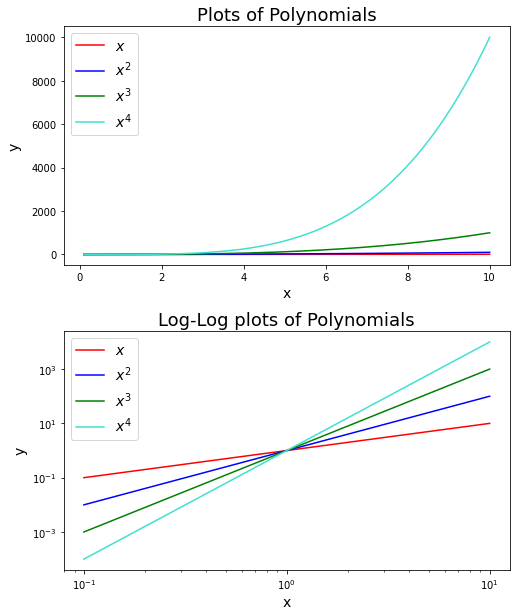

In [10]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,10)) # Two plots vertically stacked
fig.subplots_adjust(hspace=0.275)              # A little more space between the plots for the second title
ax1.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
ax1.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
ax1.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
ax1.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
ax1.set_title('Plots of Polynomials',fontsize=18) # Give the plot a title, extra large.
ax1.set_xlabel('x',fontsize=14)                        # Set a label of the x-axis
ax1.set_ylabel('y',fontsize=14)
ax1.legend(fontsize=14)

ax2.plot(x,y1,label="$x$",color="red")   # Make the plot on the axes, give it a label for the legend.
ax2.plot(x,y2,label="$x^2$",color="blue")   # Make the plot on the axes, give it a label for the legend.
ax2.plot(x,y3,label="$x^3$",color="green")   # Make the plot on the axes, give it a label for the legend.
ax2.plot(x,y4,label="$x^4$",color="turquoise")   # Make the plot on the axes, give it a label for the legend.
# Note the use of $ formula $ - this typesets using LaTex.
ax2.set_title('Log-Log plots of Polynomials',fontsize=18) # Give the plot a title, extra large.
ax2.set_xlabel('x',fontsize=14)                        # Set a label of the x-axis
ax2.set_ylabel('y',fontsize=14)
ax2.legend(fontsize=14)
ax2.semilogy()
ax2.semilogx()

# Other types of plots

## Bar graphs

The bar graph is quite useful. It is the standard graph for spreadsheets and financial reporting, but can be quite useful for physics as well.
To make a bar graph, use `plt.bar(x,height)`. Note that the array `x` will be the centers, and `heights` will be the height of the bar. 

As an example, here is a binomial distribution as a bar chart. Consider you do an experiment where you flip a coin C time, and you repeat this experiment N times. For those N experiments, how many times do you get "heads" 0,1,2,...C times? Make a plot of the result if C=10 and N=20

Note that there are some sublteties in this calculation. The np.random.binomial() will "throw" the 10 coins for you you 20 times, but it returns the output of the binomial distribution. We want to make a histogram of that distribution, i.e add up how many times you get "1" etc. We can create the histogram data with np.histogram(). This function can take as one of its parameters the bin edges, which is useful to determine where you want them. The `plt.bar` however takes centers and widths, you need to convert the edges to centers. We can have the widths fixed.

<BarContainer object of 11 artists>

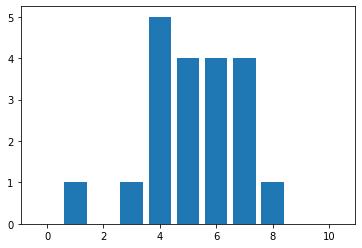

In [11]:
p = 0.5  # Probability for heads. This is an honest coin.
C = 10
N = 20
coinflips = np.random.binomial(C, p, N)
counts, bins = np.histogram(coinflips,np.arange(-0.5,C+1.5,1))  # Note: bins wil have 1 more than counts since it is bin edges!
center = (bins[:-1] + bins[1:]) / 2         # These are the centers of the bins.
plt.bar(x=center,height=counts,width=0.8)   # Plot the result, with bars centered on the bins.

## Histograms

The previous example used a bar chart, which gives separate bars. To create those bars we used np.histogram. We can do this in a single step, with a different looking output, by invoking `plt.hist`. The output type can be "bar" for solid colored histograms, or "step" which is open. You can also stack histograms, see the documentation for that.

In this case we again specify the bins precisely so that they centers fall on integers. If you do not then `plt.hist` will decide where they fall.

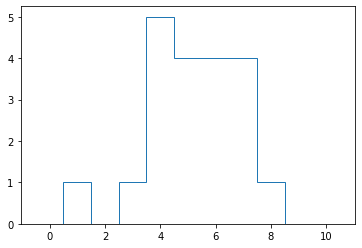

In [12]:
counts,bins,patches=plt.hist(coinflips,np.arange(-0.5,C+1.5,1),histtype="step")

## Pie Charts

Another favorite from financial reporting. 

Here is an example pie chart.

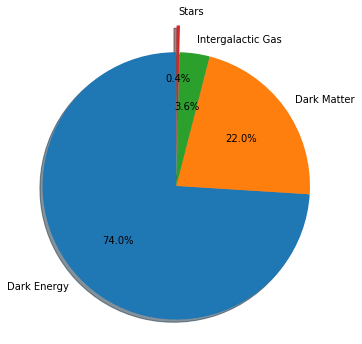

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig=plt.figure(figsize=(6,6))
labels = ['Dark Energy', 'Dark Matter', 'Intergalactic Gas', 'Stars']
sizes = [74, 22, 3.6, 0.4]
explode = (0, 0, 0, 0.2)  # only "explode" the last slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

You could improve on this pie chart in all sorts of ways, changing the size of the labels, the colors, etc. See the documentation.

## Other types

There are a lot of other types, and you can learn about them in the [matplotlib gallery](https://matplotlib.org/3.1.0/gallery/index.html) These more advanced types include different 2D plots (contours, color maps, polar plots...) and even 3D plots. 